In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 64
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 256 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q1 Part (a) Write training loop

938it [00:19, 47.82it/s]                                                        


Epoch 1 of 100
Generator loss: 2.55852461, Discriminator loss: 1.03531420


938it [00:19, 47.73it/s]                                                        


Epoch 2 of 100
Generator loss: 1.51807380, Discriminator loss: 1.08613956


938it [00:19, 47.82it/s]                                                        


Epoch 3 of 100
Generator loss: 2.36845088, Discriminator loss: 0.74688619


938it [00:20, 46.81it/s]                                                        


Epoch 4 of 100
Generator loss: 2.57271147, Discriminator loss: 0.56988072


938it [00:19, 47.56it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


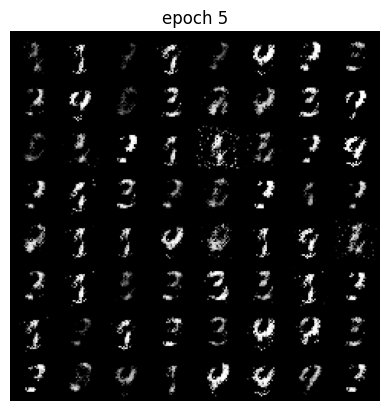

Epoch 5 of 100
Generator loss: 2.34120464, Discriminator loss: 0.60860884


938it [00:19, 47.74it/s]                                                        


Epoch 6 of 100
Generator loss: 2.23073840, Discriminator loss: 0.65904397


938it [00:19, 47.81it/s]                                                        


Epoch 7 of 100
Generator loss: 1.98687398, Discriminator loss: 0.76588035


938it [00:20, 46.75it/s]                                                        


Epoch 8 of 100
Generator loss: 2.09202337, Discriminator loss: 0.73095793


938it [00:20, 46.78it/s]                                                        


Epoch 9 of 100
Generator loss: 1.96324670, Discriminator loss: 0.78498709


938it [00:19, 47.08it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


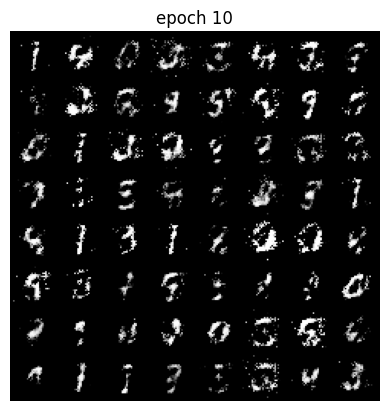

Epoch 10 of 100
Generator loss: 1.86126435, Discriminator loss: 0.80518407


938it [00:19, 47.85it/s]                                                        


Epoch 11 of 100
Generator loss: 1.66996944, Discriminator loss: 0.88563693


938it [00:19, 46.91it/s]                                                        


Epoch 12 of 100
Generator loss: 1.74494720, Discriminator loss: 0.87091970


938it [00:19, 47.81it/s]                                                        


Epoch 13 of 100
Generator loss: 1.60363793, Discriminator loss: 0.91774935


938it [00:19, 47.31it/s]                                                        


Epoch 14 of 100
Generator loss: 1.46786916, Discriminator loss: 0.98157954


938it [00:20, 46.81it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


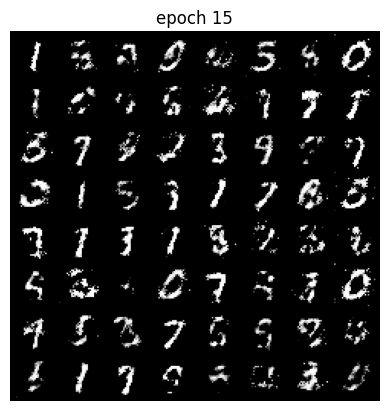

Epoch 15 of 100
Generator loss: 1.42579114, Discriminator loss: 1.00561082


938it [00:20, 46.42it/s]                                                        


Epoch 16 of 100
Generator loss: 1.43860042, Discriminator loss: 0.97872895


938it [00:19, 48.13it/s]                                                        


Epoch 17 of 100
Generator loss: 1.36233509, Discriminator loss: 1.01606810


938it [00:19, 48.35it/s]                                                        


Epoch 18 of 100
Generator loss: 1.31272113, Discriminator loss: 1.04493392


938it [00:19, 47.80it/s]                                                        


Epoch 19 of 100
Generator loss: 1.33171272, Discriminator loss: 1.03496194


938it [00:19, 48.67it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


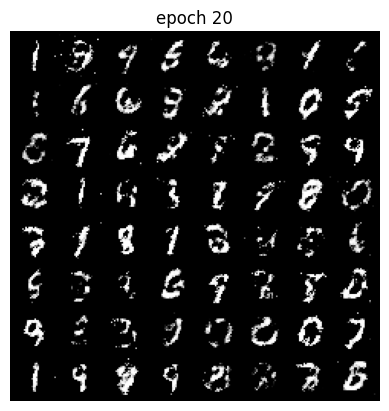

Epoch 20 of 100
Generator loss: 1.28916800, Discriminator loss: 1.06165826


938it [00:19, 48.12it/s]                                                        


Epoch 21 of 100
Generator loss: 1.23380649, Discriminator loss: 1.07393205


938it [00:19, 48.05it/s]                                                        


Epoch 22 of 100
Generator loss: 1.20701385, Discriminator loss: 1.09333336


938it [00:19, 48.30it/s]                                                        


Epoch 23 of 100
Generator loss: 1.21039283, Discriminator loss: 1.09289241


938it [00:19, 48.72it/s]                                                        


Epoch 24 of 100
Generator loss: 1.22382832, Discriminator loss: 1.09452832


938it [00:19, 48.26it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


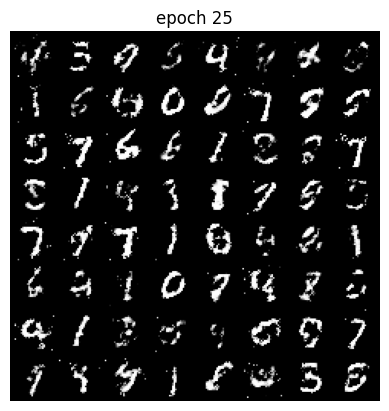

Epoch 25 of 100
Generator loss: 1.17798233, Discriminator loss: 1.11488843


938it [00:20, 46.86it/s]                                                        


Epoch 26 of 100
Generator loss: 1.13412845, Discriminator loss: 1.13300216


938it [00:19, 47.57it/s]                                                        


Epoch 27 of 100
Generator loss: 1.15105760, Discriminator loss: 1.12875175


938it [00:19, 47.72it/s]                                                        


Epoch 28 of 100
Generator loss: 1.10964537, Discriminator loss: 1.15454721


938it [00:19, 49.16it/s]                                                        


Epoch 29 of 100
Generator loss: 1.10813832, Discriminator loss: 1.15048933


938it [00:18, 49.66it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


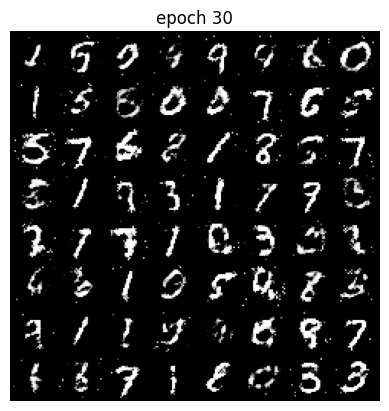

Epoch 30 of 100
Generator loss: 1.08577788, Discriminator loss: 1.16685748


938it [00:18, 49.91it/s]                                                        


Epoch 31 of 100
Generator loss: 1.08322442, Discriminator loss: 1.15907180


938it [00:18, 49.53it/s]                                                        


Epoch 32 of 100
Generator loss: 1.08025324, Discriminator loss: 1.16993439


938it [00:18, 49.75it/s]                                                        


Epoch 33 of 100
Generator loss: 1.04094470, Discriminator loss: 1.18554878


938it [00:18, 50.10it/s]                                                        


Epoch 34 of 100
Generator loss: 1.05630016, Discriminator loss: 1.18194032


938it [00:19, 49.15it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


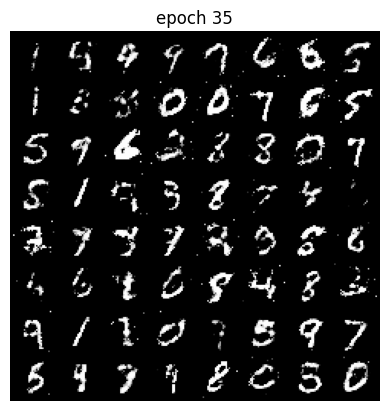

Epoch 35 of 100
Generator loss: 1.03781235, Discriminator loss: 1.19000196


938it [00:19, 48.58it/s]                                                        


Epoch 36 of 100
Generator loss: 1.02458966, Discriminator loss: 1.19832170


938it [00:18, 50.20it/s]                                                        


Epoch 37 of 100
Generator loss: 1.02119565, Discriminator loss: 1.19469082


938it [00:18, 50.87it/s]                                                        


Epoch 38 of 100
Generator loss: 1.02337849, Discriminator loss: 1.20353842


938it [00:18, 49.66it/s]                                                        


Epoch 39 of 100
Generator loss: 0.99342716, Discriminator loss: 1.21867859


938it [00:18, 50.51it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


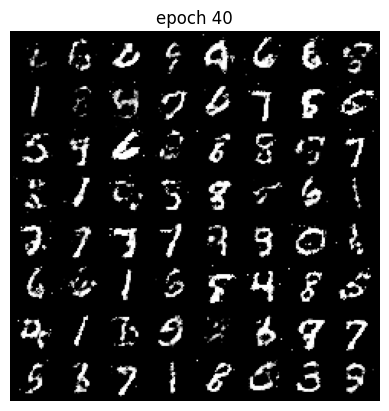

Epoch 40 of 100
Generator loss: 0.98828948, Discriminator loss: 1.22187769


938it [00:18, 50.86it/s]                                                        


Epoch 41 of 100
Generator loss: 0.99925715, Discriminator loss: 1.21753657


938it [00:18, 50.40it/s]                                                        


Epoch 42 of 100
Generator loss: 0.99140376, Discriminator loss: 1.21760583


938it [00:20, 45.29it/s]                                                        


Epoch 43 of 100
Generator loss: 0.96401596, Discriminator loss: 1.22617161


938it [00:19, 48.35it/s]                                                        


Epoch 44 of 100
Generator loss: 0.97631407, Discriminator loss: 1.23350418


938it [00:18, 49.96it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


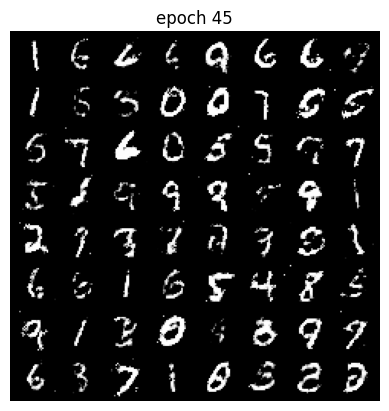

Epoch 45 of 100
Generator loss: 0.98075414, Discriminator loss: 1.22508812


938it [00:18, 49.73it/s]                                                        


Epoch 46 of 100
Generator loss: 0.97262228, Discriminator loss: 1.23046410


938it [00:18, 50.05it/s]                                                        


Epoch 47 of 100
Generator loss: 0.95475405, Discriminator loss: 1.24031484


938it [00:18, 49.99it/s]                                                        


Epoch 48 of 100
Generator loss: 0.95774800, Discriminator loss: 1.24328935


938it [00:18, 50.51it/s]                                                        


Epoch 49 of 100
Generator loss: 0.94266921, Discriminator loss: 1.24471533


938it [00:18, 51.04it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


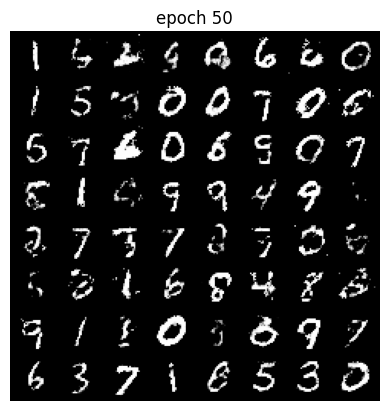

Epoch 50 of 100
Generator loss: 0.92960584, Discriminator loss: 1.25235641


938it [00:18, 50.79it/s]                                                        


Epoch 51 of 100
Generator loss: 0.93748116, Discriminator loss: 1.25276411


938it [00:18, 51.04it/s]                                                        


Epoch 52 of 100
Generator loss: 0.94994277, Discriminator loss: 1.24374151


938it [00:18, 50.81it/s]                                                        


Epoch 53 of 100
Generator loss: 0.94616377, Discriminator loss: 1.24919021


938it [00:18, 50.66it/s]                                                        


Epoch 54 of 100
Generator loss: 0.94705111, Discriminator loss: 1.24126828


938it [00:18, 50.71it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


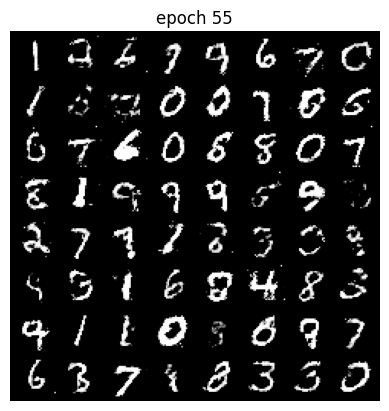

Epoch 55 of 100
Generator loss: 0.93499506, Discriminator loss: 1.25396800


938it [00:18, 51.29it/s]                                                        


Epoch 56 of 100
Generator loss: 0.93828136, Discriminator loss: 1.24975753


938it [00:18, 50.94it/s]                                                        


Epoch 57 of 100
Generator loss: 0.92396080, Discriminator loss: 1.25650179


938it [00:18, 50.90it/s]                                                        


Epoch 58 of 100
Generator loss: 0.92853737, Discriminator loss: 1.25658429


938it [00:18, 51.19it/s]                                                        


Epoch 59 of 100
Generator loss: 0.92978597, Discriminator loss: 1.25271285


938it [00:18, 51.35it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


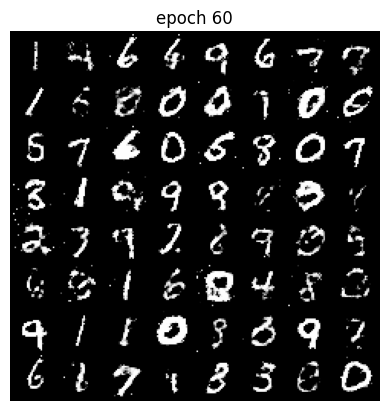

Epoch 60 of 100
Generator loss: 0.93191695, Discriminator loss: 1.25646961


938it [00:18, 51.51it/s]                                                        


Epoch 61 of 100
Generator loss: 0.92777658, Discriminator loss: 1.25662625


938it [00:18, 51.58it/s]                                                        


Epoch 62 of 100
Generator loss: 0.93095529, Discriminator loss: 1.25640547


938it [00:18, 51.75it/s]                                                        


Epoch 63 of 100
Generator loss: 0.90745205, Discriminator loss: 1.26878846


938it [00:18, 51.76it/s]                                                        


Epoch 64 of 100
Generator loss: 0.90509063, Discriminator loss: 1.26903355


938it [00:18, 52.11it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


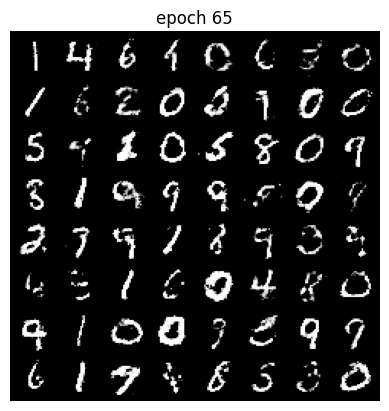

Epoch 65 of 100
Generator loss: 0.91089135, Discriminator loss: 1.26729834


938it [00:18, 51.86it/s]                                                        


Epoch 66 of 100
Generator loss: 0.91884303, Discriminator loss: 1.26368916


938it [00:18, 52.04it/s]                                                        


Epoch 67 of 100
Generator loss: 0.92556530, Discriminator loss: 1.25753689


938it [00:18, 52.01it/s]                                                        


Epoch 68 of 100
Generator loss: 0.90484619, Discriminator loss: 1.26904309


938it [00:18, 51.80it/s]                                                        


Epoch 69 of 100
Generator loss: 0.90439981, Discriminator loss: 1.26867104


938it [00:17, 52.46it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


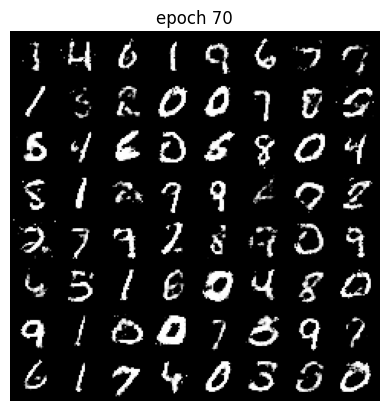

Epoch 70 of 100
Generator loss: 0.90401673, Discriminator loss: 1.27308726


938it [00:18, 51.76it/s]                                                        


Epoch 71 of 100
Generator loss: 0.90965664, Discriminator loss: 1.27286947


938it [00:17, 52.59it/s]                                                        


Epoch 72 of 100
Generator loss: 0.89898181, Discriminator loss: 1.27326775


938it [00:18, 51.84it/s]                                                        


Epoch 73 of 100
Generator loss: 0.91234237, Discriminator loss: 1.26696599


938it [00:18, 52.09it/s]                                                        


Epoch 74 of 100
Generator loss: 0.89419991, Discriminator loss: 1.27606297


938it [00:17, 52.40it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


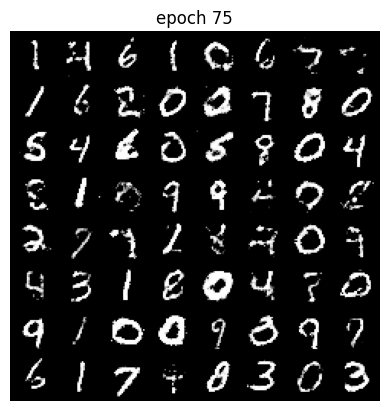

Epoch 75 of 100
Generator loss: 0.90242046, Discriminator loss: 1.27232242


938it [00:17, 52.52it/s]                                                        


Epoch 76 of 100
Generator loss: 0.90835285, Discriminator loss: 1.27078438


938it [00:17, 52.82it/s]                                                        


Epoch 77 of 100
Generator loss: 0.89683014, Discriminator loss: 1.27691460


938it [00:17, 52.86it/s]                                                        


Epoch 78 of 100
Generator loss: 0.90227020, Discriminator loss: 1.27151728


938it [00:17, 52.65it/s]                                                        


Epoch 79 of 100
Generator loss: 0.91819382, Discriminator loss: 1.26687670


938it [00:17, 52.38it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


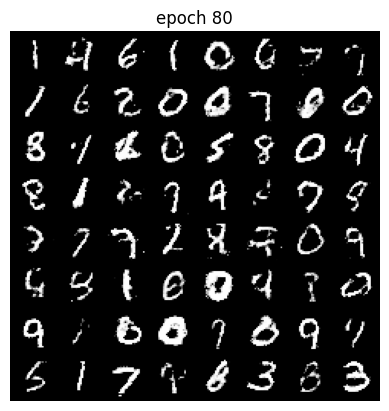

Epoch 80 of 100
Generator loss: 0.90545589, Discriminator loss: 1.26989174


938it [00:18, 51.38it/s]                                                        


Epoch 81 of 100
Generator loss: 0.90516424, Discriminator loss: 1.27061057


938it [00:18, 51.45it/s]                                                        


Epoch 82 of 100
Generator loss: 0.89712846, Discriminator loss: 1.27401519


938it [00:18, 51.32it/s]                                                        


Epoch 83 of 100
Generator loss: 0.91119576, Discriminator loss: 1.27105904


938it [00:18, 51.23it/s]                                                        


Epoch 84 of 100
Generator loss: 0.88422418, Discriminator loss: 1.27893353


938it [00:18, 50.90it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


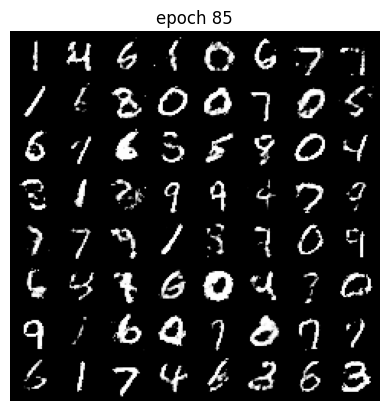

Epoch 85 of 100
Generator loss: 0.90429175, Discriminator loss: 1.27645564


938it [00:18, 51.68it/s]                                                        


Epoch 86 of 100
Generator loss: 0.90344226, Discriminator loss: 1.27380264


938it [00:18, 50.79it/s]                                                        


Epoch 87 of 100
Generator loss: 0.89655703, Discriminator loss: 1.27372503


938it [00:18, 51.14it/s]                                                        


Epoch 88 of 100
Generator loss: 0.91297084, Discriminator loss: 1.26995397


938it [00:18, 51.56it/s]                                                        


Epoch 89 of 100
Generator loss: 0.89803421, Discriminator loss: 1.27337277


938it [00:18, 50.79it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


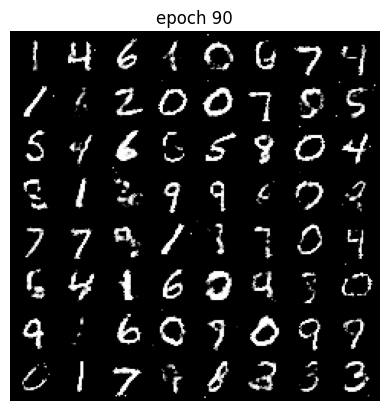

Epoch 90 of 100
Generator loss: 0.89381260, Discriminator loss: 1.27913654


938it [00:18, 51.54it/s]                                                        


Epoch 91 of 100
Generator loss: 0.89905208, Discriminator loss: 1.27367771


938it [00:18, 51.10it/s]                                                        


Epoch 92 of 100
Generator loss: 0.90336025, Discriminator loss: 1.27172530


938it [00:18, 51.60it/s]                                                        


Epoch 93 of 100
Generator loss: 0.88776815, Discriminator loss: 1.28151751


938it [00:18, 50.55it/s]                                                        


Epoch 94 of 100
Generator loss: 0.88909787, Discriminator loss: 1.27782929


938it [00:18, 51.71it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


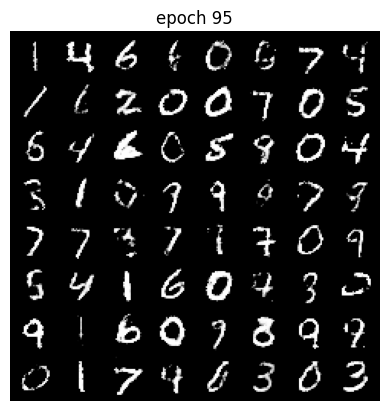

Epoch 95 of 100
Generator loss: 0.91305864, Discriminator loss: 1.27412474


938it [00:17, 52.20it/s]                                                        


Epoch 96 of 100
Generator loss: 0.90141809, Discriminator loss: 1.27569449


938it [00:17, 52.19it/s]                                                        


Epoch 97 of 100
Generator loss: 0.88414288, Discriminator loss: 1.28377938


938it [00:18, 51.36it/s]                                                        


Epoch 98 of 100
Generator loss: 0.90356976, Discriminator loss: 1.27252364


938it [00:17, 52.22it/s]                                                        


Epoch 99 of 100
Generator loss: 0.90792370, Discriminator loss: 1.27341020


938it [00:17, 52.44it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


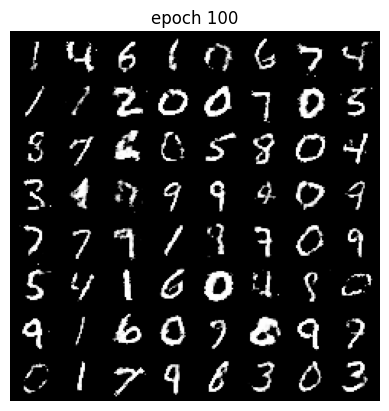

Epoch 100 of 100
Generator loss: 0.89409578, Discriminator loss: 1.27555633


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        optim_d.zero_grad()
        
        x, _ = data
        x = x.to(device)
        batch_size = x.size(0)

        z = create_noise(batch_size, nz)
        G_z = generator(z).detach()
    
        D_x = discriminator(x)
        D_G_z = discriminator(G_z)

        real_labels = label_real(batch_size)
        fake_labels = label_fake(batch_size)
        
        loss_d_on_x = discriminator_loss(D_x, real_labels)
        loss_d_on_G_z = discriminator_loss(D_G_z, fake_labels)

        loss_d_on_x_and_G_z = loss_d_on_x + loss_d_on_G_z
        
        loss_d_on_x_and_G_z.backward()
        optim_d.step()
        
        loss_d += loss_d_on_x_and_G_z

        optim_g.zero_grad()

        z = create_noise(batch_size, nz)
        G_z = generator(z)

        D_G_z = discriminator(G_z)

        batch_size = G_z.size(0)
        real_labels = label_real(batch_size)
        
        loss_g_on_G_z = generator_loss(D_G_z, real_labels)
        
        loss_g_on_G_z.backward()
        optim_g.step()
        
        loss_g += loss_g_on_G_z

        # Reference:
        # 1. S.R. Rath, "Generating MNIST Digit Images using Vanilla GAN with PyTorch", Aug 2020
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/c_gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.detach().cpu())
    losses_d.append(epoch_loss_d.detach().cpu())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/c_generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/c_generator_images.gif', imgs)

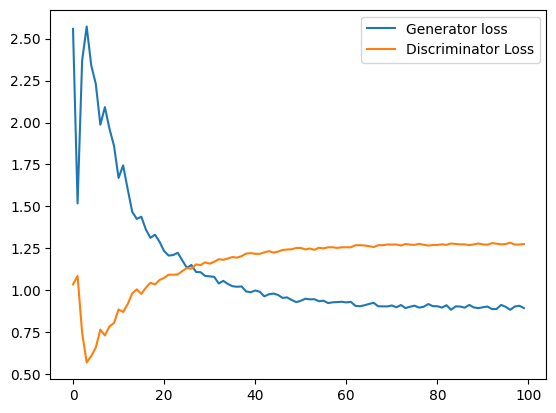

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/c_loss.png')